# Inception_v3 Model

### <u>Action Classes - 20</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import inception_v3

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-25 18:43:27.092055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 18:43:27.202297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 18:43:27.202615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)


In [4]:
image_size = (299,299)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 5118 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Basketball': 3,
 'Biking': 4,
 'Diving': 5,
 'Fencing': 6,
 'IceDancing': 7,
 'Kayaking': 8,
 'MilitaryParade': 9,
 'PizzaTossing': 10,
 'PullUps': 11,
 'ShavingBeard': 12,
 'SkateBoarding': 13,
 'SumoWrestling': 14,
 'Surfing': 15,
 'TennisSwing': 16,
 'Typing': 17,
 'WritingOnBoard': 18,
 'YoYo': 19}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

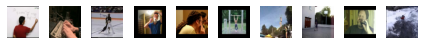

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

## Initialize model

In [8]:
inception_v3_model_top = inception_v3.InceptionV3(include_top=True,
                   input_shape=(299,299,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(inception_v3_model_top.layers):
    print((i, layer.name, layer.output_shape))

2022-08-25 18:43:28.085783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 18:43:28.086793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 18:43:28.087051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 18:43:28.087154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 299, 299, 3)])
(1, 'conv2d', (None, 149, 149, 32))
(2, 'batch_normalization', (None, 149, 149, 32))
(3, 'activation', (None, 149, 149, 32))
(4, 'conv2d_1', (None, 147, 147, 32))
(5, 'batch_normalization_1', (None, 147, 147, 32))
(6, 'activation_1', (None, 147, 147, 32))
(7, 'conv2d_2', (None, 147, 147, 64))
(8, 'batch_normalization_2', (None, 147, 147, 64))
(9, 'activation_2', (None, 147, 147, 64))
(10, 'max_pooling2d', (None, 73, 73, 64))
(11, 'conv2d_3', (None, 73, 73, 80))
(12, 'batch_normalization_3', (None, 73, 73, 80))
(13, 'activation_3', (None, 73, 73, 80))
(14, 'conv2d_4', (None, 71, 71, 192))
(15, 'batch_normalization_4', (None, 71, 71, 192))
(16, 'activation_4', (None, 71, 71, 192))
(17, 'max_pooling2d_1', (None, 35, 35, 192))
(18, 'conv2d_8', (None, 35, 35, 64))
(19, 'batch_normalization_8', (None, 35, 35, 64))
(20, 'activation_8', (None, 35, 35, 64))
(21, 'conv2d_6', (None, 35, 35, 48))
(22, 'conv2d_9', (None, 35, 35, 96))
(23, 'batch_normalization_6

In [9]:
inception_v3_model = inception_v3.InceptionV3(include_top=False,
                   input_shape=(299,299,3),
                   pooling='avg',classes=20,
                   weights='imagenet')

for (i,layer) in enumerate(inception_v3_model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

(0, 'input_2', [(None, 299, 299, 3)])
(1, 'conv2d_94', (None, 149, 149, 32))
(2, 'batch_normalization_94', (None, 149, 149, 32))
(3, 'activation_94', (None, 149, 149, 32))
(4, 'conv2d_95', (None, 147, 147, 32))
(5, 'batch_normalization_95', (None, 147, 147, 32))
(6, 'activation_95', (None, 147, 147, 32))
(7, 'conv2d_96', (None, 147, 147, 64))
(8, 'batch_normalization_96', (None, 147, 147, 64))
(9, 'activation_96', (None, 147, 147, 64))
(10, 'max_pooling2d_4', (None, 73, 73, 64))
(11, 'conv2d_97', (None, 73, 73, 80))
(12, 'batch_normalization_97', (None, 73, 73, 80))
(13, 'activation_97', (None, 73, 73, 80))
(14, 'conv2d_98', (None, 71, 71, 192))
(15, 'batch_normalization_98', (None, 71, 71, 192))
(16, 'activation_98', (None, 71, 71, 192))
(17, 'max_pooling2d_5', (None, 35, 35, 192))
(18, 'conv2d_102', (None, 35, 35, 64))
(19, 'batch_normalization_102', (None, 35, 35, 64))
(20, 'activation_102', (None, 35, 35, 64))
(21, 'conv2d_100', (None, 35, 35, 48))
(22, 'conv2d_103', (None, 35, 35,

In [10]:
model = models.Sequential()

dense_layer_1 = Dense(32, activation='relu')
prediction_layer = Dense(20, activation='softmax')

model.add(inception_v3_model)
model.add(dense_layer_1)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 21,869,012
Trainable params: 66,228
Non-trainable params: 21,802,784
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-20-model-inception_v3_model.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-25 18:43:37.777515: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-25 18:43:39.291845: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


512/512 [==============================] - 67s 116ms/step - loss: 0.9075 - accuracy: 0.7685 - val_loss: 0.4676 - val_accuracy: 0.8614
Epoch 2/20
512/512 [==============================] - 58s 113ms/step - loss: 0.1785 - accuracy: 0.9642 - val_loss: 0.4016 - val_accuracy: 0.8795
Epoch 3/20
512/512 [==============================] - 62s 121ms/step - loss: 0.0937 - accuracy: 0.9807 - val_loss: 0.3684 - val_accuracy: 0.8724
Epoch 4/20
512/512 [==============================] - 64s 125ms/step - loss: 0.0547 - accuracy: 0.9898 - val_loss: 0.3751 - val_accuracy: 0.8803
Epoch 5/20
512/512 [==============================] - 71s 138ms/step - loss: 0.0364 - accuracy: 0.9947 - val_loss: 0.4237 - val_accuracy: 0.8803
Epoch 6/20
512/512 [==============================] - 95s 185ms/step - loss: 0.0210 - accuracy: 0.9986 - val_loss: 0.3898 - val_accuracy: 0.8772
Epoch 7/20
512/512 [==============================] - 110s 215ms/step - loss: 0.0176 - accuracy: 0.9980 - val_loss: 0.4505 - val_accuracy: 0.

In [14]:
model.save("./models/action-class-20-trained-inception_v3_model.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-20-trained-inception_v3_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 21,869,012
Trainable params: 66,228
Non-trainable params: 21,802,784
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

127/127 [==============================] - 20s 132ms/step - loss: 0.4414 - accuracy: 0.8984


[0.44139841198921204, 0.8984252214431763]

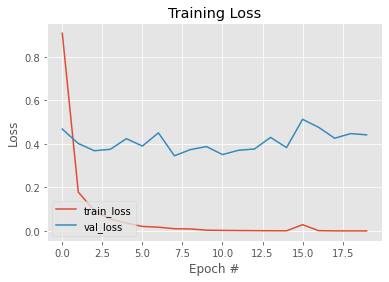

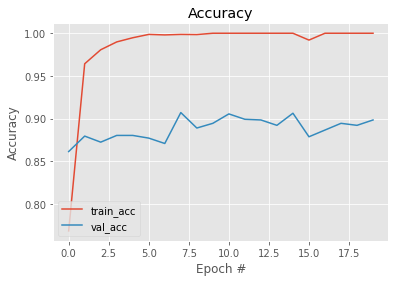

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20))


Avg Val Acc: 0.8882283449172974
Avg Val Loss: 0.40977955162525176
